<a href="https://colab.research.google.com/github/IoanPJ/Final_year_project_IMPJ/blob/main/ML/imbalanced_CL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import imblearn
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss, roc_auc_score, RocCurveDisplay, roc_curve
import numpy as np
import pandas as pd
#from IMPJ import DataProcessor
import random
import matplotlib.pyplot as plt
from os.path import basename, exists
import matplotlib as mpl
import random
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.multiclass import OneVsRestClassifier
from tqdm import tqdm

#dp = DataProcessor()

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
test_size = 0.3

filepath = "/content/drive/My Drive/Colab Notebooks/chiaro_12.csv"
data = pd.read_csv(filepath, index_col=0)
data = data.dropna()
Y = np.array(data['CLASS1'])
X = np.array(data.drop(labels='CLASS1',axis=1))
#X,Y = dp.choose_2_vars('CLASS1',data,1,2)

In [36]:
Y[Y==2]=1 # non radio galaxies
Y[Y==3]=0 # radio galaxies

init_ratio = len(Y[Y==0])/len(Y[Y==1])

sm = SMOTE(random_state=42, sampling_strategy=init_ratio*5)
ru = RandomUnderSampler(random_state=42, sampling_strategy=1)

scaler = StandardScaler()


In [46]:
NN = MLPClassifier(activation='tanh',hidden_layer_sizes=(50,50),learning_rate='constant',solver='sgd',
                   max_iter=5000,random_state=5)
BNN = BaggingClassifier(estimator=NN,n_estimators=5,bootstrap=True,verbose=0,n_jobs=-1)
#ovr = OneVsRestClassifier(estimator=BNN, n_jobs=-1,verbose=10)
iteration=0
kf = KFold(n_splits=10)

y_pred=pd.DataFrame()
y_proba=pd.DataFrame()

for train_indices, test_indices in tqdm(kf.split(X)):
    iteration+=1
    x_train=X[train_indices]
    y_train = Y[train_indices]
    x_test=X[test_indices]
    y_test=Y[test_indices]
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    #print(f'Initial Ratio: {len(y_train[y_train==0])/len(y_train[y_train==1])}')
    #print(f'Original Dataset Shape: {Counter(y_train)}')
    x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
    x_train_res, y_train_res = ru.fit_resample(x_train_sm,y_train_sm)
    #print(f'New Ratio: {len(y_train_res[y_train_res==0])/len(y_train_res[y_train_res==1])}')
    #print(f'Resampled dataset shape {Counter(y_train_res)}')
    BNN.fit(x_train, y_train)

    y_pred['iteration '+str(iteration)] = BNN.predict(x_test)
    y_proba['class' + str(0) + ' iteration '+ str(iteration)] = BNN.predict_proba(x_test)[0]
    y_proba['class'+str(1)+' iteration '+str(iteration)]= BNN.predict_proba(x_test)[1]
#BNN.fit(x_train_res,y_train_res)
y_pred.to_csv("/content/drive/My Drive/Colab Notebooks/imbalanced_trials/y_pred.csv")
y_proba.to_csv("/content/drive/My Drive/Colab Notebooks/imbalanced_trials/y_proba.csv")


0it [00:00, ?it/s]

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    9.5s


1it [00:11, 11.86s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   11.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.04363560676574707s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.027701377868652344s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.022411584854125977s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Usi

2it [00:22, 11.25s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.018301010131835938s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.022377729415893555s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.018492460250854492s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Us

3it [00:36, 12.60s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   14.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.015009164810180664s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.015783309936523438s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.014767646789550781s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Us

4it [00:47, 12.00s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   11.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.01617741584777832s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.014853715896606445s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.015127182006835938s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Usi

5it [00:55, 10.48s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    7.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0146026611328125s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.016112089157104492s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.014807939529418945s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Usin

6it [01:05, 10.32s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.014975786209106445s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.014643192291259766s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.015197515487670898s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Us

7it [01:14,  9.80s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.025746583938598633s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.018529891967773438s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.027369022369384766s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Us

8it [01:24,  9.73s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.015448331832885742s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.015008687973022461s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.014881372451782227s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Us

9it [01:34,  9.79s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.020423412322998047s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.011798381805419922s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.015397787094116211s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Us

10it [01:43, 10.32s/it]

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.02310800552368164s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0204927921295166s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.02507328987121582s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


[0 1]
The Neural Network accuracy is 72.03389830508475
The Neural Network ROC AUC Scores are: 0.6515926972729356
The Neural Network's Weighted Average ROC AUC Score is: 0.6515926972729356
The Neural Network's Logarithmic Loss Score is: 10.08000476136327
The Neural Network F1 Score is: 0.8344481605351171
The Neural Network Confusion Matrix is:
[[ 11   8]
 [190 499]]


Text(0, 0.5, 'True Positive Rate')

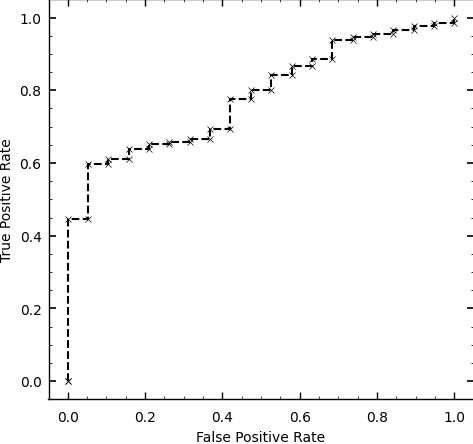

In [30]:
print(np.unique(y_train))

''' SCORING METRICS '''

accuracy = accuracy_score(y_test, y_pred)*100
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc_weightedavg = roc_auc_score(y_test,y_pred,average='weighted')
logloss = log_loss(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_proba.T[1])

print('The Neural Network accuracy is ' + str(accuracy))
print('The Neural Network ROC AUC Scores are: '+str(roc_auc))
print("The Neural Network's Weighted Average ROC AUC Score is: " + str(roc_auc_weightedavg))
print("The Neural Network's Logarithmic Loss Score is: " + str(logloss))
print('The Neural Network F1 Score is: '+str(f1))
print('The Neural Network Confusion Matrix is:')
print(confusion)

resultcols = ['Accuracy', 'ROC AUC', 'ROC Weighted Av', 'Logarithmic Loss',
            'F1 Score', 'CMatrix11','CMatrix12', 'CMatrix21', 'CMatrix22']
resultarray = np.array((accuracy,roc_auc,roc_auc_weightedavg,logloss,f1,
                        confusion[0,0],confusion[0,1],confusion[1,0],confusion[1,1]))
rocresultcols = ['FPR','TPR','Thresholds']
rocresultarray = np.array([fpr,tpr,thresholds])
#print(rocresultarray)
results = pd.DataFrame([resultarray],columns=resultcols)
rocresults = pd.DataFrame(np.array([fpr,tpr,thresholds]).transpose(),columns=rocresultcols)

results.to_csv("/content/drive/My Drive/Colab Notebooks/imbalanced_trials/results1.csv")
rocresults.to_csv("/content/drive/My Drive/Colab Notebooks/imbalanced_trials/rocresults1.csv")


fig, ax = plt.subplots(figsize=(5,5))

ax.plot(fpr,tpr,linestyle='dashed',marker='x')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')